Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


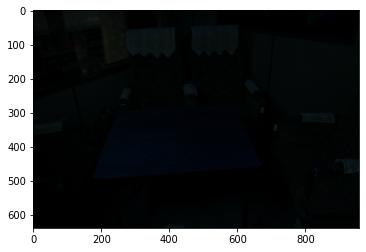

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from PIL import ImageFilter
input_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/input.jpg')
height, width, channel = input_img.shape
input_color = cv2.cvtColor(input_img.astype(np.uint8),cv2.COLOR_BGR2HSV)
output_color= np.zeros((height, width,channel))
plt.imshow(input_img)

<BarContainer object of 256 artists>

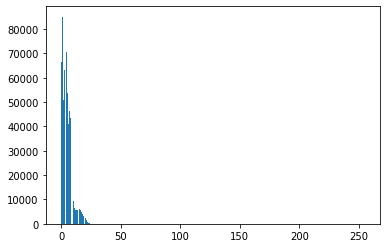

In [ ]:
gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_img], [0], None, [256], [0,256])
#ヒストグラムを棒グラフとして表示
data_x = np.zeros(256)
data_y = np.zeros(256)
for i in range(0, 256):
  data_x[i] = i
  data_y[i] = hist[i]
plt.bar(data_x, data_y)

In [ ]:
gamma = 2.0
lookup_table = np.zeros(256, np.float32)
for i in range(0, 256):
  lookup_table[i] = 255.0*pow(float(i)/255.0, 1.0/gamma)


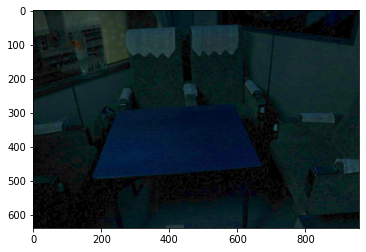

In [ ]:
output_color[:,:,2] = cv2.LUT(input_color[:,:,2], lookup_table)
output_color[:,:,1] =input_color[:,:,1]
output_color[:,:,0] =input_color[:,:,0]
output_color_bgr = cv2.cvtColor(output_color.astype(np.uint8),cv2.COLOR_HSV2BGR)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/output.jpg',output_color_bgr)
plt.imshow(output_color_bgr)

<BarContainer object of 256 artists>

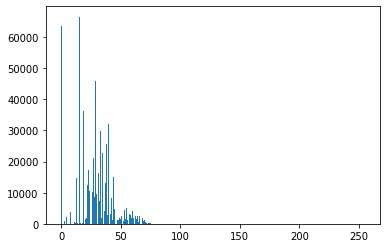

In [ ]:
gray2_img = cv2.cvtColor(output_color_bgr, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray2_img], [0], None, [256], [0,256])
#ヒストグラムを棒グラフとして表示
data_x = np.zeros(256)
data_y = np.zeros(256)
for i in range(0, 256):
  data_x[i] = i
  data_y[i] = hist[i]
plt.bar(data_x, data_y)